In [1]:
import pandas as pd 
import numpy as np
from pandas.tseries.offsets import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Read dataset
gkx= pd.read_csv("datashare.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'datashare.csv'

In [4]:
gkx1 = gkx.head(10000)
gkx1.to_csv('out.csv',index = False)

In [7]:
crsp_m= pd.read_csv("Monthly_Stock_Returns(2).csv")

In [8]:
# Standardize identifiers and date formats
gkx.columns= gkx.columns.str.lower()

In [11]:
print (gkx.columns)

Index(['permno', 'date', 'mvel1', 'beta', 'betasq', 'chmom', 'dolvol',
       'idiovol', 'indmom', 'mom1m', 'mom6m', 'mom12m', 'mom36m', 'pricedelay',
       'turn', 'absacc', 'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt',
       'cashpr', 'cfp', 'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv',
       'chpmia', 'convind', 'currat', 'depr', 'divi', 'divo', 'dy', 'egr',
       'ep', 'gma', 'grcapx', 'grltnoa', 'herf', 'hire', 'invest', 'lev',
       'lgr', 'mve_ia', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat',
       'pchdepr', 'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt',
       'pchsale_pchrect', 'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'ps',
       'quick', 'rd', 'rd_mve', 'rd_sale', 'realestate', 'roic', 'salecash',
       'saleinv', 'salerec', 'secured', 'securedind', 'sgr', 'sin', 'sp',
       'tang', 'tb', 'aeavol', 'cash', 'chtx', 'cinvest', 'ear', 'nincr',
       'roaq', 'roavol', 'roeq', 'rsup', 'stdacc', 'stdcf', 'ms', 'baspread',
       'ill', 'maxret', 'retvol', '

In [13]:
crsp_m.columns= crsp_m.columns.str.lower()

In [29]:
print (crsp_m.columns)

Index(['permno', 'date', 'prc', 'ret', 'altprc'], dtype='object')


In [31]:
crsp_m['date'] = pd.to_datetime(crsp_m['date'].astype(str)) + MonthEnd(0)
gkx['date'] = pd.to_datetime(gkx['date'].astype(str)) + MonthEnd(0)

In [33]:
merged_data=pd.merge(gkx,crsp_m[['date', 'permno', 'prc', 'ret']],on=['permno','date'], how='inner')

In [37]:
# Question 1.a
# Randomly select 500 stocks
np.random.seed(42)
asset_pricing= np.random.choice(merged_data['permno'].unique(),500)

In [39]:
asset_pricing

array([15024, 79878, 24045, 59889, 90452, 10942, 69745, 91528, 80312,
       81565, 36952, 91167, 77224, 10301, 80242, 14147, 33806, 22891,
       14168, 42235, 59117, 55344, 84807, 83190, 89032, 86795, 84102,
       22382, 21962, 85395, 17039, 84334, 45882, 21749, 13565, 85652,
       48768, 89313, 36265, 16677, 28695, 83669, 10326, 55722, 19351,
       15772, 77340, 90828, 91030, 74895, 90027, 53720, 63247, 16265,
       86976, 15858, 44273, 14440, 92913, 90990, 14555, 79869, 82263,
       11210, 44170, 77389, 50569, 32643, 21312, 16044, 86161, 26972,
       10619, 85906, 75979, 87428, 38280, 28760, 12012, 20774, 63925,
       12933, 33014, 25697, 10477, 32847, 25937, 17114, 12032, 17245,
       13938, 17332, 17516, 82653, 46472, 89864, 11183, 89813, 82166,
       11200, 20414, 68428, 58667, 84366, 80827, 80423, 68495, 43799,
       90953, 37823, 45233, 79320, 58406, 91272, 35597, 17603, 76875,
       11701, 68399, 55773, 77730, 86198, 93043, 26033, 12004, 79091,
       86209, 14855,

In [41]:
fkx= merged_data[merged_data ['permno'].isin(asset_pricing)]
fkx = fkx.reset_index()
fkx

,index,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,prc,ret
0,161,12933,1957-01-31,7.446000e+03,0.461245,0.212747,-0.038447,6.617403,0.027945,0.046433,...,0.005795,3.263096e-06,0.022556,0.009939,1.095980,1.656076,5.526316e+00,NaN,16.62500,-0.022059
1,189,13565,1957-01-31,2.001188e+04,0.633904,0.401834,0.467009,9.047821,0.035489,0.046433,...,0.024940,4.261234e-07,0.091429,0.029189,0.913001,3.192276,1.105263e+00,NaN,23.00000,-0.056410
2,190,13573,1957-01-31,1.953000e+05,1.433184,2.054017,-0.170050,10.642796,0.020151,0.046433,...,0.018908,5.642013e-08,0.029126,0.013071,0.544948,0.636255,1.065397e-07,NaN,43.25000,0.098413
3,197,13792,1957-01-31,2.798200e+05,1.237785,1.532113,-0.056500,10.632177,0.025709,0.046433,...,0.019320,5.223595e-08,0.028249,0.016473,0.486292,0.628444,1.007679e-07,40.0,21.25000,0.016471
4,202,13901,1957-01-31,1.216149e+05,0.613783,0.376729,-0.098552,9.666934,0.025270,0.046433,...,0.011026,9.562487e-08,0.017910,0.007771,0.376835,0.202302,2.058111e-07,21.0,42.87500,0.017804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61898,3325147,91849,2021-12-31,1.965155e+07,0.526026,0.276703,-0.029118,16.817296,0.026462,0.406290,...,0.019069,1.178446e-10,0.022964,0.017416,0.377813,1.996912,2.051332e-08,73.0,182.82001,0.088331
61899,3325186,92252,2021-12-31,3.162742e+04,0.827852,0.685338,-0.365570,11.854300,0.127009,0.150013,...,0.077495,5.607088e-08,0.060345,0.035147,0.841542,22.227598,5.353029e-09,NaN,1.30000,-0.442060
61900,3325188,92293,2021-12-31,4.711070e+06,0.956340,0.914587,-1.275815,15.961694,0.067032,0.406290,...,0.033089,3.478503e-10,0.031532,0.036463,0.500754,8.778336,8.272949e-09,73.0,42.47000,-0.021879
61901,3325190,92303,2021-12-31,1.549461e+05,0.838127,0.702456,-0.183235,9.792696,0.037061,0.435138,...,0.010327,1.033249e-07,0.015541,0.007873,1.447259,4.373064,4.041427e-08,60.0,16.17000,-0.017501


In [43]:
# Define sample period
start1 = '2000-01-01'
end1 = '2020-12-31'
perf = fkx[(fkx['date']>=start1) & (fkx['date']<=end1)]
perf = perf.reset_index()

perf

,level_0,index,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,prc,ret
0,41646,2178787,10114,2000-01-31,2.863338e+05,1.564697,2.448275,0.283513,13.807075,0.085041,...,0.076375,6.374930e-09,0.129944,0.061787,0.367910,9.167403,4.250957e-09,73.0,3.1250,-0.390244
1,41647,2178821,10239,2000-01-31,2.397686e+05,0.361214,0.130476,-0.023280,10.460285,0.045977,...,0.029708,5.469837e-07,0.070552,0.036181,1.135541,0.529616,1.720368e-07,63.0,19.1250,-0.135593
2,41648,2178974,10942,2000-01-31,1.105123e+07,1.736161,3.014256,0.322148,17.292461,0.058250,...,0.051606,2.035889e-10,0.133297,0.040031,0.534863,12.064159,5.344782e-09,73.0,143.3750,-0.009499
3,41649,2179015,11183,2000-01-31,5.242294e+04,1.530481,2.342372,-0.339559,8.079076,0.097990,...,0.059592,1.059170e-05,0.116279,0.052398,1.135174,0.712195,9.545456e-01,38.0,5.5625,0.022989
4,41650,2179076,11484,2000-01-31,7.604800e+04,1.771154,3.136987,0.670065,11.805513,0.093863,...,0.171431,2.068349e-08,0.666667,0.181260,1.172044,127.064766,9.570311e-10,50.0,3.8750,0.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19504,61150,3276429,91849,2020-12-31,1.698212e+07,0.624981,0.390601,0.234598,16.420618,0.029539,...,0.021204,1.857297e-10,0.023038,0.012124,0.322924,1.218228,2.951424e-08,73.0,153.2000,0.046943
19505,61151,3276475,92252,2020-12-31,1.124240e+04,0.551253,0.303880,-0.357062,10.717650,0.112036,...,0.057666,1.834079e-07,0.083333,0.027465,0.556239,4.876221,1.075796e-08,28.0,0.8800,0.353846
19506,61152,3276477,92293,2020-12-31,2.396949e+06,0.694025,0.481670,0.218188,15.269058,0.042865,...,0.034093,8.843759e-10,0.059679,0.022246,0.411942,3.803389,1.172454e-08,73.0,22.4700,0.024624
19507,61153,3276479,92303,2020-12-31,1.080374e+05,0.998123,0.996249,0.480255,10.598039,0.036268,...,0.028767,2.167216e-07,0.088670,0.027046,0.754460,0.854894,1.255603e-07,60.0,11.4000,0.041667


In [45]:
# Sort by date and drop na value
perf = perf.sort_values(by=['date', 'permno'])
perf = perf.dropna(subset=['ret'])

# Calculate deciles based on beta within each date
perf['decile'] = perf.groupby('date')['beta'].transform(lambda x: pd.qcut(x, 10, labels=False))
perf['decile'] = perf['decile'] + 1

# Calculate the one-month ahead return for each permno, aligning it back with fkx
perf = perf.assign(one_month_ahead_return=perf.groupby('permno')['ret'].shift(1))

# Calculate the average one-month ahead return for each decile
average_returns = perf.groupby('decile')['one_month_ahead_return'].mean()

# Display the average returns by decile
print(average_returns)

decile
1.0     0.006371
2.0     0.010539
3.0     0.009248
4.0     0.010046
5.0     0.006480
6.0     0.012793
7.0     0.011144
8.0     0.004567
9.0     0.005703
10.0    0.008449
Name: one_month_ahead_return, dtype: float64


In [47]:
# Initialize list to store t-values and p-values for each decile
t_stats = []
p_values = []

for decile, returns in perf.groupby('decile')['one_month_ahead_return']:
    t_stat, p_value = stats.ttest_1samp(returns.dropna(), 0)
    t_stats.append(t_stat)
    p_values.append(p_value)

# Combine results in a DataFrame
significance_results = pd.DataFrame({'Decile': range(10), 't-stat': t_stats, 'p-value': p_values})
print("\nStatistical Significance Test for Decile Returns:\n", significance_results)


Statistical Significance Test for Decile Returns:
    Decile    t-stat   p-value
0       0  1.720377  0.085527
1       1  4.163174  0.000033
2       2  3.530778  0.000425
3       3  2.975307  0.002966
4       4  1.853025  0.064042
5       5  3.561751  0.000378
6       6  2.590850  0.009653
7       7  0.888944  0.374153
8       8  1.069681  0.284909
9       9  1.303362  0.192610


In [49]:
# Question 1.b
!pip install yfinance

In [51]:
# Get S&P500 from yfinance
import yfinance as yf

# Download S&P 500 data using yfinance
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2020-12-31', interval='1mo')

# Reset index to have 'Date' as a column
sp500_data.reset_index(inplace=True)

# Select relevant columns: 'Date' and 'Adj Close' (adjusted close price)
sp500_data = sp500_data[['Date', 'Adj Close']]

# Rename columns for clarity
sp500_data.columns = ['date', 'sp500_index']

# Display the first few rows
print(sp500_data.head())


[*********************100%***********************]  1 of 1 completed

                       date  sp500_index
0 2000-01-01 00:00:00+00:00  1394.459961
1 2000-02-01 00:00:00+00:00  1366.420044
2 2000-03-01 00:00:00+00:00  1498.579956
3 2000-04-01 00:00:00+00:00  1452.430054
4 2000-05-01 00:00:00+00:00  1420.599976


In [53]:
# Convert to the last day of each month
sp500_data['date'] = pd.to_datetime(sp500_data['date'].astype(str)) + MonthEnd(0)
sp500_data

,date,sp500_index
0,2000-01-31 00:00:00+00:00,1394.459961
1,2000-02-29 00:00:00+00:00,1366.420044
2,2000-03-31 00:00:00+00:00,1498.579956
3,2000-04-30 00:00:00+00:00,1452.430054
4,2000-05-31 00:00:00+00:00,1420.599976
...,...,...
247,2020-08-31 00:00:00+00:00,3500.310059
248,2020-09-30 00:00:00+00:00,3363.000000
249,2020-10-31 00:00:00+00:00,3269.959961
250,2020-11-30 00:00:00+00:00,3621.629883


In [55]:
# Get the risk-free rate
tb3ms = pd.read_csv("TB3MS.csv")
tb3ms

,DATE,TB3MS
0,1934-01-01,0.72
1,1934-02-01,0.62
2,1934-03-01,0.24
3,1934-04-01,0.15
4,1934-05-01,0.16
...,...,...
1085,2024-06-01,5.24
1086,2024-07-01,5.20
1087,2024-08-01,5.05
1088,2024-09-01,4.72


In [57]:
tb3ms.columns= tb3ms.columns.str.lower()
tb3ms

,date,tb3ms
0,1934-01-01,0.72
1,1934-02-01,0.62
2,1934-03-01,0.24
3,1934-04-01,0.15
4,1934-05-01,0.16
...,...,...
1085,2024-06-01,5.24
1086,2024-07-01,5.20
1087,2024-08-01,5.05
1088,2024-09-01,4.72


In [59]:
# Convert to the last day of each month
tb3ms['date'] = pd.to_datetime(tb3ms['date'].astype(str)) + MonthEnd(0)

In [61]:
from functools import reduce
import pandas as pd

# Ensure all dataframes have 'date' in the same format
perf['date'] = pd.to_datetime(perf['date']).dt.tz_localize(None)
sp500_data['date'] = pd.to_datetime(sp500_data['date']).dt.tz_localize(None)
tb3ms['date'] = pd.to_datetime(tb3ms['date']).dt.tz_localize(None)

# Merge the dataframes
data_frames = [perf, sp500_data, tb3ms]
full_data = reduce(lambda left, right: pd.merge(left, right, on=['date'], how='inner'), data_frames)

# Sort by date
full_data = full_data.sort_values(by=['date'])

# Display the merged dataframe
full_data


,level_0,index,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,...,std_dolvol,std_turn,zerotrade,sic2,prc,ret,decile,one_month_ahead_return,sp500_index,tb3ms
0,41646,2178787,10114,2000-01-31,2.863338e+05,1.564697,2.448275,0.283513,13.807075,0.085041,...,0.367910,9.167403,4.250957e-09,73.0,3.1250,-0.390244,9.0,NaN,1394.459961,5.32
90,41736,2184156,85647,2000-01-31,5.780428e+05,1.300726,1.691887,-0.776255,12.605405,0.075335,...,0.481832,1.882244,2.674106e-08,75.0,19.8125,-0.172324,8.0,NaN,1394.459961,5.32
89,41735,2184012,85395,2000-01-31,2.644282e+05,1.972240,3.889732,-0.611303,15.074446,0.115190,...,0.805406,70.542568,1.802856e-09,73.0,11.1875,-0.339483,10.0,NaN,1394.459961,5.32
88,41734,2183785,84738,2000-01-31,4.212775e+04,0.878906,0.772476,0.284810,9.368092,0.032825,...,1.422706,4.826765,9.545455e-01,60.0,10.3750,-0.145714,6.0,NaN,1394.459961,5.32
87,41733,2183753,84617,2000-01-31,3.082188e+04,0.983682,0.967631,0.264706,9.942378,0.132935,...,0.947915,8.727955,1.056416e-08,20.0,3.0000,-0.040000,7.0,NaN,1394.459961,5.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19474,61120,3274021,17245,2020-12-31,2.645205e+05,0.478291,0.228763,0.762692,11.903678,0.053124,...,0.778462,6.498099,1.828339e-08,NaN,9.8600,0.093126,1.0,0.316788,3756.070068,0.09
19475,61121,3274042,17332,2020-12-31,3.347417e+05,0.965725,0.932625,0.420972,12.600368,0.059238,...,0.512124,2.514654,2.997142e-08,NaN,24.8100,0.211885,5.0,0.119411,3756.070068,0.09
19476,61122,3274118,17878,2020-12-31,3.559316e+06,0.684428,0.468441,1.013956,15.665901,0.099540,...,0.499271,1.757802,2.796175e-08,NaN,131.5800,0.429285,2.0,0.298082,3756.070068,0.09
19463,61109,3273420,14610,2020-12-31,5.569758e+04,1.313046,1.724090,0.150890,13.081121,0.263241,...,0.762824,72.746818,1.316261e-09,50.0,1.0200,-0.081081,7.0,0.099010,3756.070068,0.09


In [63]:
# Transfer the annual Treasury bill yields into monthly
full_data['tb3ms'] = full_data['tb3ms']/12
full_data

,level_0,index,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,...,std_dolvol,std_turn,zerotrade,sic2,prc,ret,decile,one_month_ahead_return,sp500_index,tb3ms
0,41646,2178787,10114,2000-01-31,2.863338e+05,1.564697,2.448275,0.283513,13.807075,0.085041,...,0.367910,9.167403,4.250957e-09,73.0,3.1250,-0.390244,9.0,NaN,1394.459961,0.443333
90,41736,2184156,85647,2000-01-31,5.780428e+05,1.300726,1.691887,-0.776255,12.605405,0.075335,...,0.481832,1.882244,2.674106e-08,75.0,19.8125,-0.172324,8.0,NaN,1394.459961,0.443333
89,41735,2184012,85395,2000-01-31,2.644282e+05,1.972240,3.889732,-0.611303,15.074446,0.115190,...,0.805406,70.542568,1.802856e-09,73.0,11.1875,-0.339483,10.0,NaN,1394.459961,0.443333
88,41734,2183785,84738,2000-01-31,4.212775e+04,0.878906,0.772476,0.284810,9.368092,0.032825,...,1.422706,4.826765,9.545455e-01,60.0,10.3750,-0.145714,6.0,NaN,1394.459961,0.443333
87,41733,2183753,84617,2000-01-31,3.082188e+04,0.983682,0.967631,0.264706,9.942378,0.132935,...,0.947915,8.727955,1.056416e-08,20.0,3.0000,-0.040000,7.0,NaN,1394.459961,0.443333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19474,61120,3274021,17245,2020-12-31,2.645205e+05,0.478291,0.228763,0.762692,11.903678,0.053124,...,0.778462,6.498099,1.828339e-08,NaN,9.8600,0.093126,1.0,0.316788,3756.070068,0.007500
19475,61121,3274042,17332,2020-12-31,3.347417e+05,0.965725,0.932625,0.420972,12.600368,0.059238,...,0.512124,2.514654,2.997142e-08,NaN,24.8100,0.211885,5.0,0.119411,3756.070068,0.007500
19476,61122,3274118,17878,2020-12-31,3.559316e+06,0.684428,0.468441,1.013956,15.665901,0.099540,...,0.499271,1.757802,2.796175e-08,NaN,131.5800,0.429285,2.0,0.298082,3756.070068,0.007500
19463,61109,3273420,14610,2020-12-31,5.569758e+04,1.313046,1.724090,0.150890,13.081121,0.263241,...,0.762824,72.746818,1.316261e-09,50.0,1.0200,-0.081081,7.0,0.099010,3756.070068,0.007500


In [65]:
# Calculate excess return for each beta-sorted portfolio

# Calculate excess_return for each stock in each month
full_data['log_return'] = full_data['ret'] + 1
full_data['log_return'] = full_data['log_return'].apply(lambda x: np.log(x))*100

full_data['excess_return'] = full_data['log_return'] - full_data['tb3ms'] 

full_data

,level_0,index,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,...,zerotrade,sic2,prc,ret,decile,one_month_ahead_return,sp500_index,tb3ms,log_return,excess_return
0,41646,2178787,10114,2000-01-31,2.863338e+05,1.564697,2.448275,0.283513,13.807075,0.085041,...,4.250957e-09,73.0,3.1250,-0.390244,9.0,NaN,1394.459961,0.443333,-49.469640,-49.912974
90,41736,2184156,85647,2000-01-31,5.780428e+05,1.300726,1.691887,-0.776255,12.605405,0.075335,...,2.674106e-08,75.0,19.8125,-0.172324,8.0,NaN,1394.459961,0.443333,-18.913351,-19.356684
89,41735,2184012,85395,2000-01-31,2.644282e+05,1.972240,3.889732,-0.611303,15.074446,0.115190,...,1.802856e-09,73.0,11.1875,-0.339483,10.0,NaN,1394.459961,0.443333,-41.473242,-41.916575
88,41734,2183785,84738,2000-01-31,4.212775e+04,0.878906,0.772476,0.284810,9.368092,0.032825,...,9.545455e-01,60.0,10.3750,-0.145714,6.0,NaN,1394.459961,0.443333,-15.748925,-16.192258
87,41733,2183753,84617,2000-01-31,3.082188e+04,0.983682,0.967631,0.264706,9.942378,0.132935,...,1.056416e-08,20.0,3.0000,-0.040000,7.0,NaN,1394.459961,0.443333,-4.082199,-4.525533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19474,61120,3274021,17245,2020-12-31,2.645205e+05,0.478291,0.228763,0.762692,11.903678,0.053124,...,1.828339e-08,NaN,9.8600,0.093126,1.0,0.316788,3756.070068,0.007500,8.904148,8.896648
19475,61121,3274042,17332,2020-12-31,3.347417e+05,0.965725,0.932625,0.420972,12.600368,0.059238,...,2.997142e-08,NaN,24.8100,0.211885,5.0,0.119411,3756.070068,0.007500,19.217700,19.210200
19476,61122,3274118,17878,2020-12-31,3.559316e+06,0.684428,0.468441,1.013956,15.665901,0.099540,...,2.796175e-08,NaN,131.5800,0.429285,2.0,0.298082,3756.070068,0.007500,35.717432,35.709932
19463,61109,3273420,14610,2020-12-31,5.569758e+04,1.313046,1.724090,0.150890,13.081121,0.263241,...,1.316261e-09,50.0,1.0200,-0.081081,7.0,0.099010,3756.070068,0.007500,-8.455730,-8.463230


In [67]:
# Calculate portfolio excess return
portfolio_excess_returns = full_data.groupby(['date','decile'])['excess_return'].mean().rename('portfolio_excess_return').reset_index()
print(portfolio_excess_returns)

           date  decile  portfolio_excess_return
0    2000-01-31     1.0                 3.569792
1    2000-01-31     2.0                -4.317904
2    2000-01-31     3.0                -6.882554
3    2000-01-31     4.0                -0.685172
4    2000-01-31     5.0                 8.752322
...         ...     ...                      ...
2515 2020-12-31     6.0                 0.897778
2516 2020-12-31     7.0                 1.503869
2517 2020-12-31     8.0                -1.765082
2518 2020-12-31     9.0                11.390121
2519 2020-12-31    10.0                 6.098809

[2520 rows x 3 columns]


In [69]:
# OLS Regression
# Calculate market excess return
market_log_return = full_data.groupby(['date'])['sp500_index'].first().rename('sp500_index').to_frame()

market_log_return['market_log_return'] = market_log_return['sp500_index']/market_log_return['sp500_index'].shift(1)
market_log_return['market_log_return'] = market_log_return['market_log_return'].apply(lambda x: np.log(x))*100

market_log_return

,sp500_index,market_log_return
date,,
2000-01-31,1394.459961,NaN
2000-02-29,1366.420044,-2.031300
2000-03-31,1498.579956,9.232375
2000-04-30,1452.430054,-3.127991
2000-05-31,1420.599976,-2.215875
...,...,...
2020-08-31,3500.310059,6.771908
2020-09-30,3363.000000,-4.001812
2020-10-31,3269.959961,-2.805569


In [71]:
# Merge market_log_return to the full_data and calculate market_excess_return
full_data = full_data.merge(market_log_return['market_log_return'], on='date', how='left')
full_data['market_excess_return'] = full_data['market_log_return'] - full_data['tb3ms']

full_data

,level_0,index,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,...,prc,ret,decile,one_month_ahead_return,sp500_index,tb3ms,log_return,excess_return,market_log_return,market_excess_return
0,41646,2178787,10114,2000-01-31,2.863338e+05,1.564697,2.448275,0.283513,13.807075,0.085041,...,3.1250,-0.390244,9.0,NaN,1394.459961,0.443333,-49.469640,-49.912974,NaN,NaN
1,41736,2184156,85647,2000-01-31,5.780428e+05,1.300726,1.691887,-0.776255,12.605405,0.075335,...,19.8125,-0.172324,8.0,NaN,1394.459961,0.443333,-18.913351,-19.356684,NaN,NaN
2,41735,2184012,85395,2000-01-31,2.644282e+05,1.972240,3.889732,-0.611303,15.074446,0.115190,...,11.1875,-0.339483,10.0,NaN,1394.459961,0.443333,-41.473242,-41.916575,NaN,NaN
3,41734,2183785,84738,2000-01-31,4.212775e+04,0.878906,0.772476,0.284810,9.368092,0.032825,...,10.3750,-0.145714,6.0,NaN,1394.459961,0.443333,-15.748925,-16.192258,NaN,NaN
4,41733,2183753,84617,2000-01-31,3.082188e+04,0.983682,0.967631,0.264706,9.942378,0.132935,...,3.0000,-0.040000,7.0,NaN,1394.459961,0.443333,-4.082199,-4.525533,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19504,61120,3274021,17245,2020-12-31,2.645205e+05,0.478291,0.228763,0.762692,11.903678,0.053124,...,9.8600,0.093126,1.0,0.316788,3756.070068,0.007500,8.904148,8.896648,3.644905,3.637405
19505,61121,3274042,17332,2020-12-31,3.347417e+05,0.965725,0.932625,0.420972,12.600368,0.059238,...,24.8100,0.211885,5.0,0.119411,3756.070068,0.007500,19.217700,19.210200,3.644905,3.637405
19506,61122,3274118,17878,2020-12-31,3.559316e+06,0.684428,0.468441,1.013956,15.665901,0.099540,...,131.5800,0.429285,2.0,0.298082,3756.070068,0.007500,35.717432,35.709932,3.644905,3.637405
19507,61109,3273420,14610,2020-12-31,5.569758e+04,1.313046,1.724090,0.150890,13.081121,0.263241,...,1.0200,-0.081081,7.0,0.099010,3756.070068,0.007500,-8.455730,-8.463230,3.644905,3.637405


In [73]:
# Merge portfolio excess returns with market excess returns
ols_data = portfolio_excess_returns.merge(full_data[['date', 'market_excess_return']].drop_duplicates(), on='date',how='inner')
ols_data = ols_data.dropna().reset_index()

ols_data

,index,date,decile,portfolio_excess_return,market_excess_return
0,10,2000-02-29,1.0,15.706180,-2.493800
1,11,2000-02-29,2.0,4.123299,-2.493800
2,12,2000-02-29,3.0,-3.082468,-2.493800
3,13,2000-02-29,4.0,6.386229,-2.493800
4,14,2000-02-29,5.0,4.262901,-2.493800
...,...,...,...,...,...
2505,2515,2020-12-31,6.0,0.897778,3.637405
2506,2516,2020-12-31,7.0,1.503869,3.637405
2507,2517,2020-12-31,8.0,-1.765082,3.637405
2508,2518,2020-12-31,9.0,11.390121,3.637405


In [75]:
# Create a dictionary to store beta coefficients, r_squared, t-value for each decile
beta_coefficients = {}
r2 = {}
t_values = {}

# Perform OLS regression for each decile
for decile in sorted(ols_data['decile'].unique()):
    # Filter data for the current decile
    decile_data = ols_data[ols_data['decile'] == decile]
    
    # Define independent (X) and dependent (Y) variables
    X = decile_data['market_excess_return']
    y = decile_data['portfolio_excess_return']
    
    # Fit the OLS model
    model = sm.OLS(y, sm.add_constant(X)).fit()
    
    # Store the beta coefficient, r_squared, t-value in the dictionary
    beta_coefficients[decile] = model.params['market_excess_return']
    r2[decile] = model.rsquared
    t_values[decile] = model.tvalues['market_excess_return']

# Convert the dictionaries to DataFrames for easy viewing
beta_df = pd.DataFrame(beta_coefficients.items(), columns=['Decile', 'Beta_Coefficient'])
r2_df = pd.DataFrame(r2.items(), columns=['Decile', 'R2'])
t_values_df = pd.DataFrame(t_values.items(), columns=['Decile', 't-value'])

# Display the resulting beta coefficients
print(beta_df.sort_values('Decile'))
print(r2_df.sort_values('Decile'))
print(t_values_df.sort_values('Decile'))

   Decile  Beta_Coefficient
0     1.0          0.503795
1     2.0          0.592108
2     3.0          0.867545
3     4.0          0.729409
4     5.0          0.918401
5     6.0          0.973186
6     7.0          1.331489
7     8.0          1.500477
8     9.0          1.562858
9    10.0          2.193265
   Decile        R2
0     1.0  0.147778
1     2.0  0.222836
2     3.0  0.379288
3     4.0  0.242863
4     5.0  0.347892
5     6.0  0.313234
6     7.0  0.465367
7     8.0  0.344400
8     9.0  0.402962
9    10.0  0.476819
   Decile    t-value
0     1.0   6.570957
1     2.0   8.449606
2     3.0  12.335011
3     4.0   8.937037
4     5.0  11.525569
5     6.0  10.656881
6     7.0  14.722107
7     8.0  11.436990
8     9.0  12.963748
9    10.0  15.064341


In [77]:
formula = 'portfolio_excess_return ~ market_excess_return'
results = smf.ols(formula, ols_data). fit()
print (results. summary () )

                               OLS Regression Results                              
Dep. Variable:     portfolio_excess_return   R-squared:                       0.313
Model:                                 OLS   Adj. R-squared:                  0.313
Method:                      Least Squares   F-statistic:                     1143.
Date:                     Mon, 25 Nov 2024   Prob (F-statistic):          8.27e-207
Time:                             18:56:17   Log-Likelihood:                -8558.2
No. Observations:                     2510   AIC:                         1.712e+04
Df Residuals:                         2508   BIC:                         1.713e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [79]:
beta_data = full_data.groupby(['date', 'decile'])['beta'].mean().rename('decile_beta').reset_index()
print (beta_data)

           date  decile  decile_beta
0    2000-01-31     1.0     0.050050
1    2000-01-31     2.0     0.268665
2    2000-01-31     3.0     0.434078
3    2000-01-31     4.0     0.598552
4    2000-01-31     5.0     0.728841
...         ...     ...          ...
2515 2020-12-31     6.0     1.217242
2516 2020-12-31     7.0     1.273182
2517 2020-12-31     8.0     1.426348
2518 2020-12-31     9.0     1.723352
2519 2020-12-31    10.0     2.229929

[2520 rows x 3 columns]


In [81]:
full_ols_data = ols_data.merge(beta_data[['date', 'decile', 'decile_beta']], on=['date', 'decile'], how='inner')
full_ols_data

,index,date,decile,portfolio_excess_return,market_excess_return,decile_beta
0,10,2000-02-29,1.0,15.706180,-2.493800,0.043988
1,11,2000-02-29,2.0,4.123299,-2.493800,0.244964
2,12,2000-02-29,3.0,-3.082468,-2.493800,0.412634
3,13,2000-02-29,4.0,6.386229,-2.493800,0.544475
4,14,2000-02-29,5.0,4.262901,-2.493800,0.701134
...,...,...,...,...,...,...
2505,2515,2020-12-31,6.0,0.897778,3.637405,1.217242
2506,2516,2020-12-31,7.0,1.503869,3.637405,1.273182
2507,2517,2020-12-31,8.0,-1.765082,3.637405,1.426348
2508,2518,2020-12-31,9.0,11.390121,3.637405,1.723352


In [83]:
#1c
formula = 'portfolio_excess_return ~ decile_beta'
results = smf.ols(formula, full_ols_data).fit()
print (results. summary())

                               OLS Regression Results                              
Dep. Variable:     portfolio_excess_return   R-squared:                       0.011
Model:                                 OLS   Adj. R-squared:                  0.011
Method:                      Least Squares   F-statistic:                     28.78
Date:                     Mon, 25 Nov 2024   Prob (F-statistic):           8.87e-08
Time:                             18:56:21   Log-Likelihood:                -9015.2
No. Observations:                     2510   AIC:                         1.803e+04
Df Residuals:                         2508   BIC:                         1.805e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


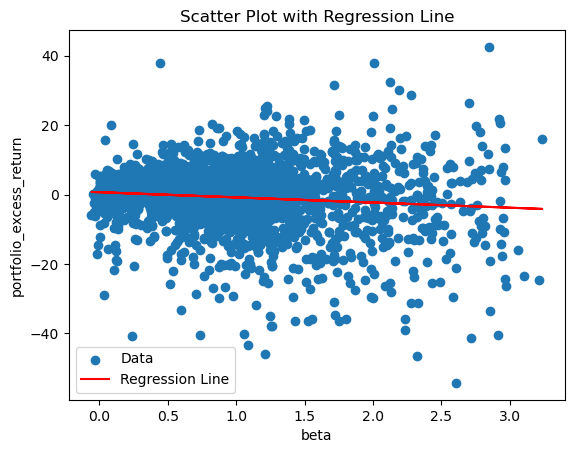

In [85]:
# Create the scatter plot
plt.scatter(full_ols_data[ 'decile_beta'], full_ols_data ['portfolio_excess_return'], label='Data')

# Plot the regression line
plt.plot(full_ols_data['decile_beta'], results.predict(), color='red', label='Regression Line')

# Add labels and title
plt.xlabel( 'beta' )
plt.ylabel('portfolio_excess_return')
plt.title('Scatter Plot with Regression Line')
plt.legend ()

# Show the plot
plt. show ()

Below Median Market Excess Return:


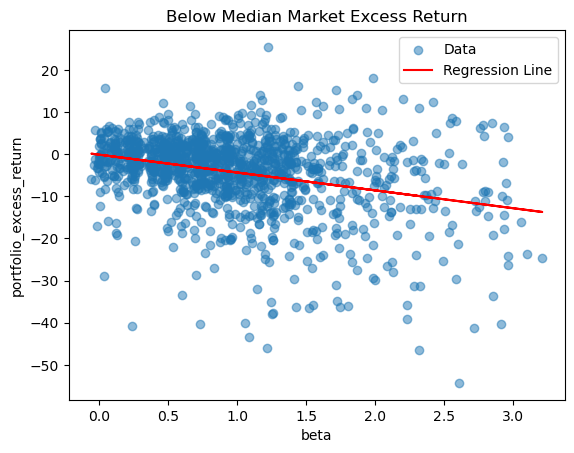

                               OLS Regression Results                              
Dep. Variable:     portfolio_excess_return   R-squared:                       0.093
Model:                                 OLS   Adj. R-squared:                  0.092
Method:                      Least Squares   F-statistic:                     129.0
Date:                     Mon, 25 Nov 2024   Prob (F-statistic):           1.57e-28
Time:                             18:56:23   Log-Likelihood:                -4497.0
No. Observations:                     1260   AIC:                             8998.
Df Residuals:                         1258   BIC:                             9008.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


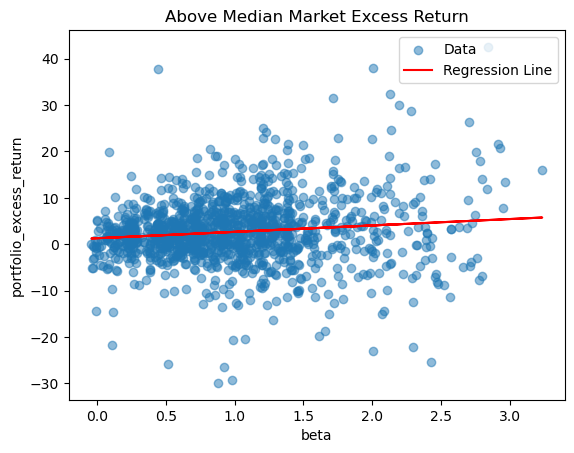

                               OLS Regression Results                              
Dep. Variable:     portfolio_excess_return   R-squared:                       0.014
Model:                                 OLS   Adj. R-squared:                  0.013
Method:                      Least Squares   F-statistic:                     17.97
Date:                     Mon, 25 Nov 2024   Prob (F-statistic):           2.41e-05
Time:                             18:56:23   Log-Likelihood:                -4218.2
No. Observations:                     1250   AIC:                             8440.
Df Residuals:                         1248   BIC:                             8451.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


In [87]:
#1d
# Step 1: Calculate the median of market_excess_return
market_median = full_ols_data['market_excess_return'].median()

# Step 2: Split the data into two subsamples
below_median = full_ols_data[full_ols_data['market_excess_return'] <= market_median]
above_median = full_ols_data[full_ols_data['market_excess_return'] > market_median]

# Step 3: Define a function to perform regression and plot
def scatter_plot_with_regression(data, title):
    # Prepare the variables for regression
    X = data['decile_beta']
    y = data['portfolio_excess_return']
    
    # Add a constant term for the intercept
    X = sm.add_constant(X)
    
    # Perform Ordinary Least Squares (OLS) regression
    model = sm.OLS(y, X).fit()
    
    # Get predictions
    y_pred = model.predict(X)
    
    # Scatter plot with regression line
    plt.scatter(data['decile_beta'], data['portfolio_excess_return'], label='Data', alpha=0.5)
    plt.plot(data['decile_beta'], y_pred, color='red', label='Regression Line')
    plt.xlabel('beta')
    plt.ylabel('portfolio_excess_return')
    plt.title(title)
    plt.legend()
    plt.show()
    
    # Print regression summary
    print(model.summary())

# Step 4: Perform analysis for each subsample
print("Below Median Market Excess Return:")
scatter_plot_with_regression(below_median, 'Below Median Market Excess Return')

print("\nAbove Median Market Excess Return:")
scatter_plot_with_regression(above_median, 'Above Median Market Excess Return')


In [101]:
full_ols_data

,index,date,decile,portfolio_excess_return,market_excess_return,decile_beta
0,10,20000229,1.0,15.706180,-2.493800,0.043988
1,11,20000229,2.0,4.123299,-2.493800,0.244964
2,12,20000229,3.0,-3.082468,-2.493800,0.412634
3,13,20000229,4.0,6.386229,-2.493800,0.544475
4,14,20000229,5.0,4.262901,-2.493800,0.701134
...,...,...,...,...,...,...
2505,2515,20201231,6.0,0.897778,3.637405,1.217242
2506,2516,20201231,7.0,1.503869,3.637405,1.273182
2507,2517,20201231,8.0,-1.765082,3.637405,1.426348
2508,2518,20201231,9.0,11.390121,3.637405,1.723352


In [103]:
full_ols_data['date'] = pd.to_datetime(full_ols_data['date']).dt.strftime('%Y%m%d')


In [105]:
full_ols_data

,index,date,decile,portfolio_excess_return,market_excess_return,decile_beta
0,10,20000229,1.0,15.706180,-2.493800,0.043988
1,11,20000229,2.0,4.123299,-2.493800,0.244964
2,12,20000229,3.0,-3.082468,-2.493800,0.412634
3,13,20000229,4.0,6.386229,-2.493800,0.544475
4,14,20000229,5.0,4.262901,-2.493800,0.701134
...,...,...,...,...,...,...
2505,2515,20201231,6.0,0.897778,3.637405,1.217242
2506,2516,20201231,7.0,1.503869,3.637405,1.273182
2507,2517,20201231,8.0,-1.765082,3.637405,1.426348
2508,2518,20201231,9.0,11.390121,3.637405,1.723352


In [107]:


# Ensure that all relevant columns are numeric
columns_to_check = ['portfolio_excess_return', 'market_excess_return', 'decile_beta']  # Adjust with actual column names
for col in columns_to_check:
    full_ols_data[col] = pd.to_numeric(full_ols_data[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Drop rows where any of the regression variables have NaN values
full_ols_data_clean = full_ols_data.dropna(subset=['portfolio_excess_return', 'market_excess_return', 'decile_beta'])

# Convert 'date' to datetime if needed (for example, using year-month grouping later)
full_ols_data_clean['date'] = pd.to_datetime(full_ols_data_clean['date'])

# Perform the regression again, now that the data is cleaned
fmb_results = []
unique_months = full_ols_data_clean['date'].dt.to_period('M').unique()  # Use month as a period

for month in unique_months:
    month_data = full_ols_data_clean[full_ols_data_clean['date'].dt.to_period('M') == month]
    
    # Define dependent and independent variables
    X = sm.add_constant(month_data[['decile_beta', 'market_excess_return']])  # Add constant (intercept)
    y = month_data['portfolio_excess_return']  # Dependent variable
    
    # Run the OLS regression
    model = sm.OLS(y, X).fit()
    fmb_results.append(model.params)

# Convert the results into a DataFrame for analysis
fmb_results_df = pd.DataFrame(fmb_results)
fmb_average = fmb_results_df.mean()

print("Fama-MacBeth Average Coefficients:")
print(fmb_average)


Fama-MacBeth Average Coefficients:
decile_beta            -1.253533
market_excess_return    3.934289
dtype: float64


In [109]:
# Step 1: Calculate the full-sample median of market_excess_return
market_excess_median = full_ols_data['market_excess_return'].median()

# Step 2: Split the dataset based on whether market_excess_return is above or below the median
above_median_data = full_ols_data[full_ols_data['market_excess_return'] > market_excess_median]
below_median_data = full_ols_data[full_ols_data['market_excess_return'] <= market_excess_median]

# Function to perform Fama-MacBeth regression on a given dataset
def fama_macbeth_regression(data):
    # Ensure the data is cleaned and has the correct numeric types
    data['portfolio_excess_return'] = pd.to_numeric(data['portfolio_excess_return'], errors='coerce')
    data['market_excess_return'] = pd.to_numeric(data['market_excess_return'], errors='coerce')
    data['decile_beta'] = pd.to_numeric(data['decile_beta'], errors='coerce')
    
    # Drop rows with NaN values in the regression variables
    data_clean = data.dropna(subset=['portfolio_excess_return', 'market_excess_return', 'decile_beta'])
    
    # Convert 'date' to datetime for period grouping
    data_clean['date'] = pd.to_datetime(data_clean['date'])
    
    fmb_results = []
    unique_months = data_clean['date'].dt.to_period('M').unique()  # Use month as a period

    for month in unique_months:
        month_data = data_clean[data_clean['date'].dt.to_period('M') == month]

        # Define dependent and independent variables
        X = sm.add_constant(month_data[['decile_beta', 'market_excess_return']])  # Add constant (intercept)
        y = month_data['portfolio_excess_return']  # Dependent variable

        # Run the OLS regression
        model = sm.OLS(y, X).fit()
        fmb_results.append(model.params)

    # Convert the results into a DataFrame for analysis
    fmb_results_df = pd.DataFrame(fmb_results)
    return fmb_results_df.mean()  # Return the average coefficients

# Step 3: Perform Fama-MacBeth regression for both subsets (above and below the median)
above_median_results = fama_macbeth_regression(above_median_data)
below_median_results = fama_macbeth_regression(below_median_data)

# Step 4: Compare the results
print("Fama-MacBeth Average Coefficients for Market Excess Return Above Median:")
print(above_median_results)

print("\nFama-MacBeth Average Coefficients for Market Excess Return Below Median:")
print(below_median_results)


/var/folders/dz/qsfs3bj56yd3cvgwxdgq9hb40000gn/T/ipykernel_5397/1461532602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['portfolio_excess_return'] = pd.to_numeric(data['portfolio_excess_return'], errors='coerce')
/var/folders/dz/qsfs3bj56yd3cvgwxdgq9hb40000gn/T/ipykernel_5397/1461532602.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['market_excess_return'] = pd.to_numeric(data['market_excess_return'], errors='coerce')
/var/folders/dz/qsfs3bj56yd3cvgwxdgq9hb40000gn/T/ipykernel_5397/14

Fama-MacBeth Average Coefficients for Market Excess Return Above Median:
decile_beta             1.545272
market_excess_return    0.148735
dtype: float64

Fama-MacBeth Average Coefficients for Market Excess Return Below Median:
decile_beta            -4.030124
market_excess_return    7.689799
dtype: float64


In [121]:
import pandas as pd

# Concatenate the two DataFrames side by side if they have no common columns
final_data = pd.concat([full_data, full_ols_data], axis=1)

# Display the concatenated DataFrame
print(final_data.head())


   level_0    index  permno       date       mvel1      beta    betasq  \
0    41646  2178787   10114 2000-01-31  286333.750  1.564697  2.448275   
1    41736  2184156   85647 2000-01-31  578042.750  1.300726  1.691887   
2    41735  2184012   85395 2000-01-31  264428.250  1.972240  3.889732   
3    41734  2183785   84738 2000-01-31   42127.750  0.878906  0.772476   
4    41733  2183753   84617 2000-01-31   30821.875  0.983682  0.967631   

      chmom     dolvol   idiovol  ...  log_return  excess_return  \
0  0.283513  13.807075  0.085041  ...  -49.469640     -49.912974   
1 -0.776255  12.605405  0.075335  ...  -18.913351     -19.356684   
2 -0.611303  15.074446  0.115190  ...  -41.473242     -41.916575   
3  0.284810   9.368092  0.032825  ...  -15.748925     -16.192258   
4  0.264706   9.942378  0.132935  ...   -4.082199      -4.525533   

   market_log_return  market_excess_return  index      date  decile  \
0                NaN                   NaN   10.0  20000229     1.0   
1   

In [123]:
import pandas as pd
import statsmodels.api as sm

# Step 1: Calculate the full-sample median of market_excess_return
market_excess_median = final_data['market_excess_return'].median()

# Step 2: Split the dataset based on whether market_excess_return is above or below the median
above_median_data = final_data[final_data['market_excess_return'] > market_excess_median]
below_median_data = final_data[final_data['market_excess_return'] <= market_excess_median]

# Function to perform Fama-MacBeth regression on a given dataset including control variables
def fama_macbeth_regression(data):
    # Replace 'portfolio_excess_return' with the actual column name if it's different
    data['portfolio_excess_return'] = pd.to_numeric(data['portfolio_excess_return'], errors='coerce')
    data['market_excess_return'] = pd.to_numeric(data['market_excess_return'], errors='coerce')
    data['decile_beta'] = pd.to_numeric(data['decile_beta'], errors='coerce')
    data['mvel1'] = pd.to_numeric(data['mvel1'], errors='coerce')  # Ensure mvel1 is numeric
    data['mom12m'] = pd.to_numeric(data['mom12m'], errors='coerce')  # Ensure mom12m is numeric
    
    # Drop rows with NaN values in the regression variables
    data_clean = data.dropna(subset=['portfolio_excess_return', 'market_excess_return', 'decile_beta', 'mvel1', 'mom12m'])
    
    # Convert 'date' to datetime for period grouping
    data_clean['date'] = pd.to_datetime(data_clean['date'])
    
    fmb_results = []
    unique_months = data_clean['date'].dt.to_period('M').unique()  # Use month as a period

    for month in unique_months:
        month_data = data_clean[data_clean['date'].dt.to_period('M') == month]

        # Define dependent and independent variables including control variables
        X = sm.add_constant(month_data[['decile_beta', 'market_excess_return', 'mvel1', 'mom12m']])  # Add constant (intercept)
        y = month_data['portfolio_excess_return']  # Dependent variable

        # Run the OLS regression
        model = sm.OLS(y, X).fit()
        fmb_results.append(model.params)

    # Convert the results into a DataFrame for analysis
    fmb_results_df = pd.DataFrame(fmb_results)
    return fmb_results_df.mean()  # Return the average coefficients

# Step 3: Perform Fama-MacBeth regression for both subsets (above and below the median)
above_median_results = fama_macbeth_regression(above_median_data)
below_median_results = fama_macbeth_regression(below_median_data)

# Step 4: Compare the results
print("Fama-MacBeth Average Coefficients for Market Excess Return Above Median:")
print(above_median_results)

print("\nFama-MacBeth Average Coefficients for Market Excess Return Below Median:")
print(below_median_results)


ValueError: cannot reindex on an axis with duplicate labels

In [127]:
#Check for duplicate columns and remove them if found
if final_data.columns.duplicated().any():
    print("Duplicate columns found, removing them.")
    final_data = final_data.loc[:, ~final_data.columns.duplicated()]

# Step 0: Check for duplicate index and reset if found
if final_data.index.duplicated().any():
    print("Duplicate index found, resetting index.")
    final_data.reset_index(drop=True, inplace=True)


Duplicate columns found, removing them.


In [129]:
# Step 1: Calculate the full-sample median of market_excess_return
market_excess_median = final_data['market_excess_return'].median()

# Step 2: Split the dataset based on whether market_excess_return is above or below the median
above_median_data = final_data[final_data['market_excess_return'] > market_excess_median]
below_median_data = final_data[final_data['market_excess_return'] <= market_excess_median]

# Function to perform Fama-MacBeth regression on a given dataset including control variables
def fama_macbeth_regression(data):
    # Replace 'portfolio_excess_return' with the actual column name if it's different
    data['portfolio_excess_return'] = pd.to_numeric(data['portfolio_excess_return'], errors='coerce')
    data['market_excess_return'] = pd.to_numeric(data['market_excess_return'], errors='coerce')
    data['decile_beta'] = pd.to_numeric(data['decile_beta'], errors='coerce')
    data['mvel1'] = pd.to_numeric(data['mvel1'], errors='coerce')  # Ensure mvel1 is numeric
    data['mom12m'] = pd.to_numeric(data['mom12m'], errors='coerce')  # Ensure mom12m is numeric
    
    # Drop rows with NaN values in the regression variables
    data_clean = data.dropna(subset=['portfolio_excess_return', 'market_excess_return', 'decile_beta', 'mvel1', 'mom12m'])
    
    # Convert 'date' to datetime for period grouping
    data_clean['date'] = pd.to_datetime(data_clean['date'])
    
    fmb_results = []
    unique_months = data_clean['date'].dt.to_period('M').unique()  # Use month as a period

    for month in unique_months:
        month_data = data_clean[data_clean['date'].dt.to_period('M') == month]

        # Define dependent and independent variables including control variables
        X = sm.add_constant(month_data[['decile_beta', 'market_excess_return', 'mvel1', 'mom12m']])  # Add constant (intercept)
        y = month_data['portfolio_excess_return']  # Dependent variable

        # Run the OLS regression
        model = sm.OLS(y, X).fit()
        fmb_results.append(model.params)

    # Convert the results into a DataFrame for analysis
    fmb_results_df = pd.DataFrame(fmb_results)
    return fmb_results_df.mean()  # Return the average coefficients

# Step 3: Perform Fama-MacBeth regression for both subsets (above and below the median)
above_median_results = fama_macbeth_regression(above_median_data)
below_median_results = fama_macbeth_regression(below_median_data)

# Step 4: Compare the results
print("Fama-MacBeth Average Coefficients for Market Excess Return Above Median:")
print(above_median_results)

print("\nFama-MacBeth Average Coefficients for Market Excess Return Below Median:")
print(below_median_results)

Fama-MacBeth Average Coefficients for Market Excess Return Above Median:
decile_beta            -6.137647e-01
market_excess_return    2.543330e-01
mvel1                  -1.230474e-08
mom12m                  6.777161e-01
dtype: float64

Fama-MacBeth Average Coefficients for Market Excess Return Below Median:
decile_beta            -1.235476e+00
market_excess_return    8.270566e-01
mvel1                  -4.817430e-08
mom12m                  4.104508e-01
dtype: float64


/var/folders/dz/qsfs3bj56yd3cvgwxdgq9hb40000gn/T/ipykernel_5397/2762334793.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['portfolio_excess_return'] = pd.to_numeric(data['portfolio_excess_return'], errors='coerce')
/var/folders/dz/qsfs3bj56yd3cvgwxdgq9hb40000gn/T/ipykernel_5397/2762334793.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['market_excess_return'] = pd.to_numeric(data['market_excess_return'], errors='coerce')
/var/folders/dz/qsfs3bj56yd3cvgwxdgq9hb40000gn/T/ipykernel_5397/27